In [704]:
# Imports
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [705]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
Y = iris.target.reshape(-1, 1)  # Labels: 0, 1, 2 (Setosa, Versicolor, Virginica)
labels = iris.target_names

In [706]:
# One-hot encode the labels
ohe = OneHotEncoder()
y = ohe.fit_transform(Y).toarray()

In [707]:
# Standardize the features
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [708]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

In [709]:
# Initialize weights and biases
np.random.seed(101)
weights_input_hidden = np.random.rand(4, 5)  # 4 inputs, 5 hidden neurons
weights_hidden_output = np.random.rand(5, 3)  # 5 hidden neurons, 3 outputs
bias_hidden = np.random.rand(1, 5)
bias_output = np.random.rand(1, 3)

# Learning rate
learning_rate = 0.1

In [710]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [711]:
# Accuracy before training
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

# Convert predictions to class labels
predicted_labels = np.argmax(predicted_output, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Test Accuracy (Before training): {accuracy * 100:.2f}%")

Test Accuracy (Before training): 36.67%


In [712]:
# Initialize a list to store loss values
loss_values = []

# Training loop
for epoch in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y_train - predicted_output) ** 2)

    # Backward pass
    error_output_layer = y_train - predicted_output
    delta_output_layer = error_output_layer * sigmoid_derivative(predicted_output)

    error_hidden_layer = delta_output_layer.dot(weights_hidden_output.T)
    delta_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(delta_output_layer) * learning_rate
    weights_input_hidden += X_train.T.dot(delta_hidden_layer) * learning_rate
    bias_output += np.sum(delta_output_layer, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(delta_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Store the loss value for visualization
    if epoch % 100 == 0:  # Store loss every 100 epochs
      loss_values.append(loss)
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.5101023819377971
Epoch 1000, Loss: 0.010054486794959822
Epoch 2000, Loss: 0.009739696706334428
Epoch 3000, Loss: 0.008963447699687637
Epoch 4000, Loss: 0.007183897130438578
Epoch 5000, Loss: 0.006425780816848915
Epoch 6000, Loss: 0.006098731443873158
Epoch 7000, Loss: 0.005928460866475487
Epoch 8000, Loss: 0.005828042550146188
Epoch 9000, Loss: 0.005761935280698391


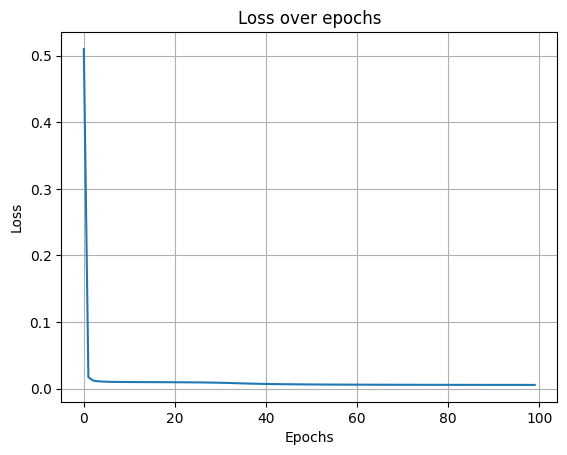

In [713]:
# Visualization of loss values
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [714]:
# Evaluate on the test set
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

# Convert predictions to class labels
predicted_labels = np.argmax(predicted_output, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 100.00%


In [715]:
incorrect_prediction_indexes = np.where(predicted_labels != true_labels)[0]
incorrect_predictions = [[predicted_labels[i] for i in incorrect_prediction_indexes], [true_labels[i] for i in incorrect_prediction_indexes]]
print("Number of Incorrect Predictions:", len(incorrect_prediction_indexes))
print("Incorrect Predictions:", incorrect_predictions)

Number of Incorrect Predictions: 0
Incorrect Predictions: [[], []]
